In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
df = pd.read_csv('amazon_laptop_prices.csv')

In [252]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [253]:
df.shape

(4446, 14)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [255]:
df.duplicated().sum()

1818

# DATA Cleaning

In [256]:
# brand

In [257]:
df['brand'].unique()

array(['ROKC', 'HP', 'MSI', 'Apple', 'Acer', 'ASUS', 'acer', 'Gateway',
       'Lenovo', 'DELL', 'Dell', 'LG', 'Microsoft', 'SAMSUNG',
       'Carlisle FoodService Products', 'Gigabyte', 'Razer', 'Asus',
       'LENOVO', 'Panasonic', 'Toughbook', 'Corsair', 'Alienware', 'AWOW',
       'Quality Refurbished Computers', 'dell', 'IVIEW', 'hp', 'XPG',
       'Computer Upgrade King', 'CTL', 'Best Notebooks', 'LPT',
       'Goldengulf', 'lenovo', 'ONN', 'Latitude', 'VAIO', 'Luqeeg',
       'MICROTELLA', 'Elo', 'SHOXLAB', 'GizPro', 'MAINGEAR', 'Tocosy',
       'asus', 'XAMMUE', 'JTD', 'Mytrix', 'TOPOSH'], dtype=object)

In [258]:
df['brand'].replace('acer','Acer',inplace=True)
df['brand'].replace('ASUS','Asus',inplace=True)
df['brand'].replace('asus','Asus',inplace=True)
df['brand'].replace('lenovo','Lenovo',inplace=True)
df['brand'].replace('LENOVO','Lenovo',inplace=True)
df['brand'].replace('hp','HP',inplace=True)
df['brand'].replace('SAMSUNG','Samsung',inplace=True)
df['brand'].replace('DELL','Dell',inplace=True)
df['brand'].replace('dell','Dell',inplace=True)
df['brand'].replace('Toughbook','Panasonic',inplace=True)

In [259]:
# removing brands that have count less than 10
brand_count = df['brand'].value_counts()
brand_to_copy = brand_count[brand_count > 10].index

df_filtered = df[df['brand'].isin(brand_to_copy)]

In [260]:
# removing ROKC brand since its refurbished laptops
df = df_filtered[df_filtered['brand'] != 'ROKC']
df['brand'].value_counts()

,count
brand,
Dell,1730
HP,810
MSI,473
Lenovo,318
Asus,163
Acer,119
LG,39
Apple,29
Samsung,23


In [261]:
# Screen size
# changing the data type to float by removing SI unit 'INCHES'

In [262]:
df['screen_size'].unique()

array(['15.6 Inches', '15.66 Inches', '13.3 Inches', '15.3 Inches',
       '16 Inches', '14 Inches', '17.3 Inches', '15 Inches',
       '13.4 Inches', '18 Inches', '17 Inches', '11.6 Inches',
       '16.2 Inches', '13.6 Inches', '14.4 Inches', '13 Inches',
       '14.5 Inches', '12.45 Inches', '12.2 Inches', '13.5 Inches',
       '13.1 Inches', '12 Inches', nan, '10.5 Inches', '12.3 Inches',
       '10.1 Inches', '13.9 Inches', '14.1 Inches', '11 Inches',
       '12.4 Inches', '15.4 Inches', '12.5 Inches', '16.1 Inches',
       '27 Inches', '10 Inches'], dtype=object)

In [263]:
df.loc[:,'screen_size'] = df['screen_size'].str.replace('Inches','')
df['screen_size'] = df['screen_size'].astype(float)

<ipython-input-263-0aeeb022150f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['screen_size'] = df['screen_size'].astype(float)


In [264]:
df['screen_size'].unique()

array([15.6 , 15.66, 13.3 , 15.3 , 16.  , 14.  , 17.3 , 15.  , 13.4 ,
       18.  , 17.  , 11.6 , 16.2 , 13.6 , 14.4 , 13.  , 14.5 , 12.45,
       12.2 , 13.5 , 13.1 , 12.  ,   nan, 10.5 , 12.3 , 10.1 , 13.9 ,
       14.1 , 11.  , 12.4 , 15.4 , 12.5 , 16.1 , 27.  , 10.  ])

In [265]:
df['screen_size'].dtype

dtype('float64')

In [266]:
# hard-disk
# remove post-fix characters like GB and TB

In [267]:
df['harddisk'].unique()

array(['1000 GB', nan, '256 GB', '128 GB', '64 GB', '512 GB', '1 TB',
       '64', '2 TB', '32 GB', '16 GB', '4 TB', '240 GB', '65 GB',
       '1024 GB', '300 GB', '320 GB', '2000 GB', '480 GB', '32 MB',
       '500 GB', '512', '128 MB', '250 GB', '160 GB', '64 MB', '8 GB',
       '8 TB', '4000 GB', '1256 GB', '1512 GB', '1.92 TB', '1.5 TB',
       '512 MB', '2048 GB', '256', '8000 GB', '6000 GB', '3 TB'],
      dtype=object)

In [268]:
df.loc[:,'harddisk'] = df['harddisk'].str.replace('GB','')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('1 TB','1000')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('2 TB','2000')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('3 TB','3000')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('32 MB','0.032')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('4 TB','4000')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('8 TB','8000')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('128 MB','0.128')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('1.92 TB','1920')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('1.5 TB','1500')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('512 MB','0.5')
df.loc[:,'harddisk'] = df['harddisk'].str.replace('64 MB','0.064')

In [269]:
df['harddisk'] = df['harddisk'].astype(float)

<ipython-input-269-acbb1b5a0569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harddisk'] = df['harddisk'].astype(float)


In [270]:
df['harddisk'].unique()

array([1.000e+03,       nan, 2.560e+02, 1.280e+02, 6.400e+01, 5.120e+02,
       2.000e+03, 3.200e+01, 1.600e+01, 4.000e+03, 2.400e+02, 6.500e+01,
       1.024e+03, 3.000e+02, 3.200e+02, 4.800e+02, 3.200e-02, 5.000e+02,
       1.280e-01, 2.500e+02, 1.600e+02, 6.400e-02, 8.000e+00, 8.000e+03,
       1.256e+03, 1.512e+03, 1.920e+00, 1.500e+03, 5.000e-01, 2.048e+03,
       6.000e+03, 3.000e+03])

In [271]:
# CPU

In [272]:
df['cpu'].unique().size

134

In [273]:
def transformar_cpu(valor):
    valor = 'Intel Core i3' if 'i3' in valor.lower() else valor
    valor = 'Intel Core i5' if 'i5' in valor.lower() else valor
    valor = 'Intel Core i9' if 'i9' in valor.lower() else valor
    valor = 'Intel Core i7' if 'i7' in valor.lower() else valor
    valor = 'Ryzen 3' if 'ryzen 3' in valor.lower() else valor
    valor = 'Ryzen 5' if 'ryzen 5' in valor.lower() else valor
    valor = 'Ryzen 7' if 'ryzen 7' in valor.lower() else valor
    valor = 'Ryzen 9' if 'ryzen 9' in valor.lower() else valor
    valor = 'Celeron' if 'celeron' in valor.lower() else valor
    valor = 'Pentium' if 'pentium' in valor.lower() else valor
    return valor

# Aplicar la función a la columna 'cpu' del DataFrame
df.loc[:,'cpu'] = df['cpu'].fillna('')
df.loc[:,'cpu'] = df['cpu'].apply(transformar_cpu)

df['cpu'].unique()

array(['Intel Core i5', 'Intel Core i9', 'Unknown', 'Ryzen 3', 'Celeron',
       'Intel Core i7', 'Intel Core i3', 'Pentium', 'Ryzen 7', 'Ryzen 5',
       'MediaTek MT8183', 'Ryzen 9', 'ARM 7100', 'Apple M1', '',
       'MediaTek_MT8127', 'AMD A Series', 'Others', 'Snapdragon', '8032',
       'Cortex', 'Athlon', '1.2GHz Cortex A8 Processor', 'Apple M2 Max',
       'MediaTek Helio P60T', 'Intel Core M-5Y10 Processor',
       'Core m3-8100Y', 'AMD R Series', 'Core M Family',
       'Core 2 Duo P8700', 'core_m', 'A-Series', 'Intel Mobile CPU',
       'Intel Atom', 'Athlon Silver 3050U', 'Apple M2', 'Core 2 Duo',
       'AMD A4', '1.2GHz Cortex A13 Processor',
       'A-Series Dual-Core A4-3300M', '68000', 'Intel Core Duo',
       'AMD Kabini A6-5200M Quad Core', 'Intel Core 2 Quad', 'Intel Xeon'],
      dtype=object)

In [274]:
# RAM

In [275]:
df['ram'].unique()

array(['64 GB', '32 GB', '8 GB', '4 GB', '16 GB', '20 GB', nan, '12 GB',
       '40 GB', '96 GB', '1 GB', '2 GB', '48 GB', '24 GB', '5 GB', '6 GB',
       '128 GB', '31.99 GB'], dtype=object)

In [276]:
df.loc[:,'ram'] = df['ram'].str.replace(' GB','')
df.loc[:,'ram'] = df['ram'].str.replace('31.99','32')
df['ram'] = df['ram'].astype(float)

<ipython-input-276-b0298fb6973b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ram'] = df['ram'].astype(float)


In [277]:
df['ram'].unique()

array([ 64.,  32.,   8.,   4.,  16.,  20.,  nan,  12.,  40.,  96.,   1.,
         2.,  48.,  24.,   5.,   6., 128.])

In [278]:
# CPU Speed
# removing frequency unit Ghz and converting it to type float

In [279]:
df['cpu_speed'].unique()

array([nan, '1.8 GHz', '1.1 GHz', '5.6 GHz', '2.1 GHz', '2.6 GHz',
       '3.4 GHz', '3.4', '4.5 GHz', '2.2 GHz', '2.4 GHz', '5 GHz',
       '3 GHz', '4.7 GHz', '2.8 GHz', '1.3 GHz', '3.7 GHz', '2.3 GHz',
       '5.1 GHz', '4.4 GHz', '1.7 GHz', '5.2 GHz', '2 GHz', '3.6 GHz',
       '4.3 GHz', '3.5 GHz', '4.1 GHz', '4 GHz', '3.49 GHz', '2.9 GHz',
       '1.6 GHz', '2.6', '3.3', '2.5 GHz', '4.8 GHz', '1 GHz', '4.2 GHz',
       '3.2 GHz', '2.4', '1.5 GHz', '2.53 GHz', '1.2 GHz', '2.7 GHz',
       '2 Hz', '3.3 GHz', '3.8 GHz', '1.4 GHz', '4.6 GHz', '3.9 GHz',
       '1.9 GHz', '9120 GHz', '1.8', '4.7', '2133 MHz', '2.2, 3.9 GHz',
       '3200 Hz', '2.5, 3.1 GHz', '1.9', '3.1 GHz', '0.9 GHz'],
      dtype=object)

In [280]:
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace(' GHz','')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('9120 ','2.4')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('9120','2.4')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('2133 MHz','2.1')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('3200 Hz','3.2')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('2 Hz','0')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('2.2, 3.9','2.2')
df.loc[:,'cpu_speed'] = df['cpu_speed'].str.replace('2.5, 3.1','2.5')
df['cpu_speed'] = df['cpu_speed'].astype(float)

<ipython-input-280-e27f007f59cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpu_speed'] = df['cpu_speed'].astype(float)


In [281]:
df['cpu_speed'].unique()

array([ nan, 1.8 , 1.1 , 5.6 , 2.1 , 2.6 , 3.4 , 4.5 , 2.2 , 2.4 , 5.  ,
       3.  , 4.7 , 2.8 , 1.3 , 3.7 , 2.3 , 5.1 , 4.4 , 1.7 , 5.2 , 2.  ,
       3.6 , 4.3 , 3.5 , 4.1 , 4.  , 3.49, 2.9 , 1.6 , 3.3 , 2.5 , 4.8 ,
       1.  , 4.2 , 3.2 , 1.5 , 2.53, 1.2 , 2.7 , 0.  , 3.8 , 1.4 , 4.6 ,
       3.9 , 1.9 , 3.1 , 0.9 ])

In [282]:
# rating

In [283]:
df['rating'].unique()

array([4.5, 5. , 4.8, 4.7, 4.4, 4.3, 4.2, 4.6, 1. , nan, 3.8, 4.1, 4. ,
       3.7, 3.9, 3.5, 3. , 2.5, 2.8, 2.9, 3.4, 3.6, 3.3, 4.9, 2.3, 2. ,
       3.1, 1.7, 2.7, 2.6, 2.1, 3.2, 2.2])

In [284]:
#Price

In [285]:
df['price'].unique()

array(['$999.99 ', '$1,599.00 ', '$689.99 ', ..., '$591.99 ',
       '$1,771.99 ', '$938.99 '], dtype=object)

In [286]:
df.loc[:, 'price'] = df['price'].str.replace('$','')
df.loc[:, 'price'] = df['price'].str.replace(',','')
df.loc[:, 'price'] = pd.to_numeric(df['price'], errors='coerce')

df = df[df['price'] <= 5600]

In [287]:
df['price'] = df['price'].astype(float)

<ipython-input-287-a1663025a8f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)


In [288]:
df['price'].unique()

array([ 999.99, 1599.  ,  689.99, ...,  591.99, 1771.99,  938.99])

In [296]:
# Operating System
df.loc[df['OS'].str.contains('win|hp|chrome', case=False, na=False), 'OS'] = 'Windows'
df.loc[df['OS'].str.contains('mac', case=False, na=False), 'OS'] = 'MAC OS'
df.loc[~df['OS'].isin(['Windows', 'MAC OS']), 'OS'] = 'Others'
df['OS'].unique()

array(['Windows', 'MAC OS', 'Others'], dtype=object)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3759 entries, 1 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3759 non-null   object 
 1   model                 3090 non-null   object 
 2   screen_size           3733 non-null   float64
 3   color                 3197 non-null   object 
 4   harddisk              3192 non-null   float64
 5   cpu                   3759 non-null   object 
 6   ram                   3699 non-null   float64
 7   OS                    3736 non-null   object 
 8   special_features      2037 non-null   object 
 9   graphics              3696 non-null   object 
 10  graphics_coprocessor  1907 non-null   object 
 11  cpu_speed             1019 non-null   float64
 12  rating                1961 non-null   float64
 13  price                 3759 non-null   float64
dtypes: float64(6), object(8)
memory usage: 440.5+ KB


# Data Analysis

In [290]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
1,HP,NaN,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32.0,Windows 11 Home,NaN,Dedicated,NaN,1.8,5.0,1599.00
3,Apple,MacBook Air,13.30,Silver,256.0,Unknown,8.0,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,Apple,MacBook Air,15.30,Midnight,256.0,Unknown,8.0,Mac OS,NaN,Integrated,NaN,NaN,4.8,1144.48
5,Acer,A315-24P-R7VH,15.60,Silver,128.0,Ryzen 3,8.0,Windows 11 S,Backlit Keyboard,Integrated,NaN,NaN,4.5,299.99


In [291]:
# drop na values of price and removing non significant features
# like color, model, special_features, graphics_co-processor

In [292]:
df.isnull().sum()

,0
brand,0
model,669
screen_size,26
color,562
harddisk,567
cpu,0
ram,60
OS,23
special_features,1722
graphics,63


In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df.drop(columns=['color', 'model', 'special_features', 'graphics_coprocessor'], inplace=True)

In [ ]:
df.isnull().sum()

,0
brand,0
screen_size,26
harddisk,567
cpu,0
ram,60
OS,23
graphics,63
cpu_speed,2740
rating,1798
price,0


# Univariant Analysis

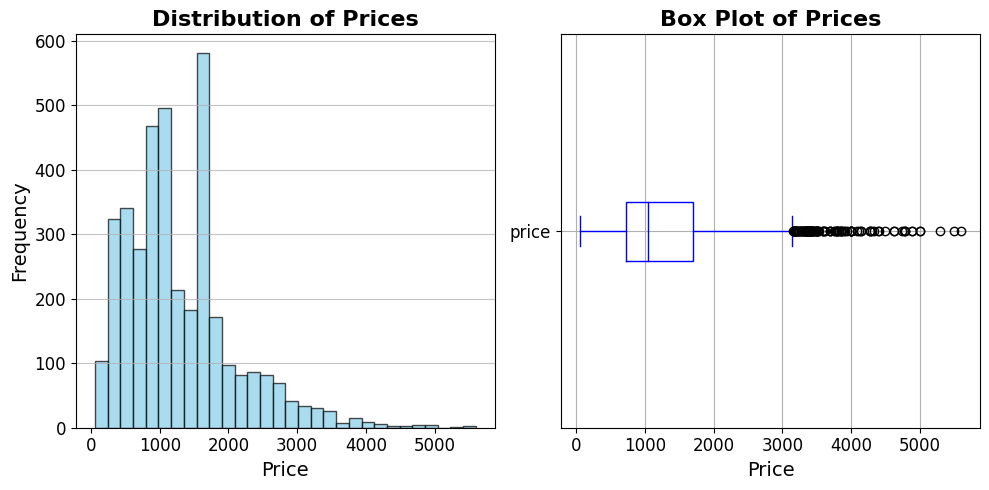

In [ ]:
# histogram and boxplot of prices
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Histogram
df['price'].plot(kind='hist', bins=30, alpha=0.7, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Distribution of Prices', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Price', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(axis='y', alpha=0.75)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Box Plot
df['price'].plot(kind='box', vert=False, ax=axs[1], color='blue', grid=True)
axs[1].set_title('Box Plot of Prices', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Price', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout for better fit
plt.tight_layout()
plt.show()


In [ ]:
# we observe that prices are right skewed
# with meadian of 1049

In [ ]:
df['price'].describe()

,price
count,3759.000000
mean,1288.842910
std,798.478154
min,57.990000
25%,731.410000
50%,1049.000000
75%,1699.000000
max,5598.290000


In [ ]:
brand_count = df['brand'].value_counts().sort_values(ascending=False)

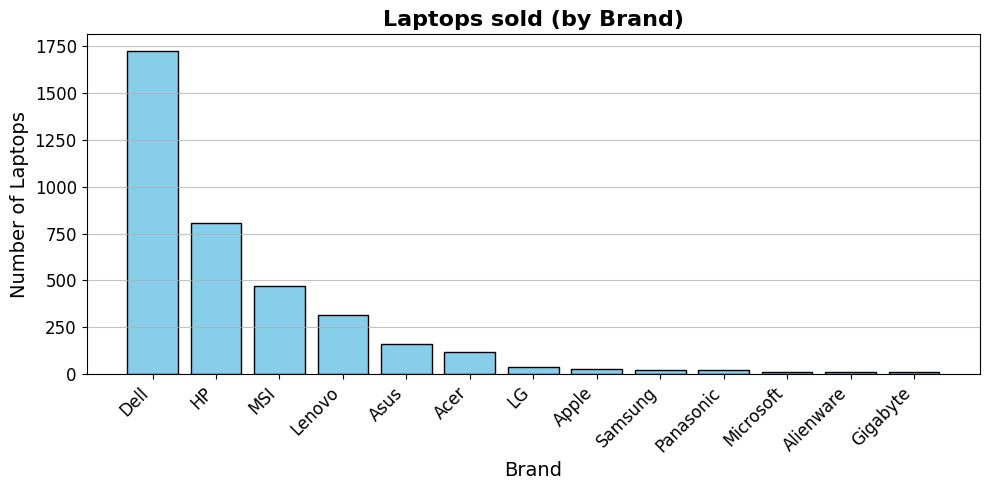

In [ ]:
# Bar chart
plt.figure(figsize=(10,5))
plt.bar(x=brand_count.index, height=brand_count.values, color='skyblue', edgecolor='black')
plt.title('Laptops sold (by Brand)', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Laptops', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
# we can see that dell is the most famous choice to be bought followed by HP then MSI

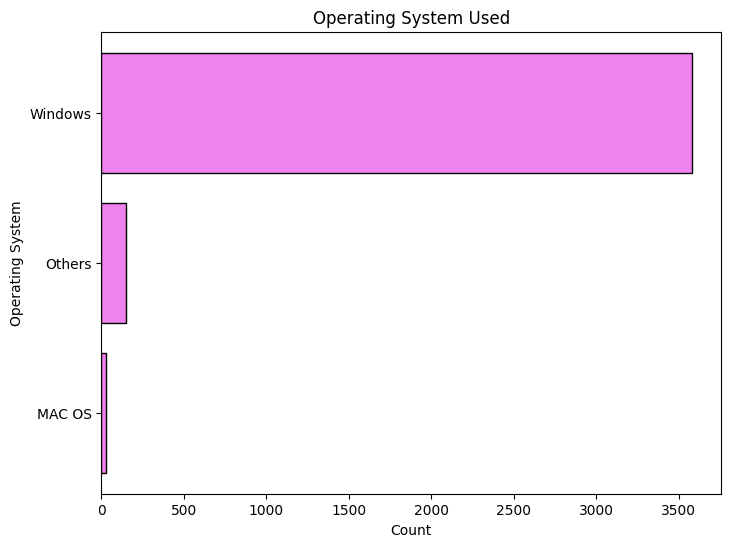

In [307]:
# Operating System Used
df_os_count = df.groupby('OS').size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
plt.barh(df_os_count['OS'], df_os_count['Count'], color='violet', edgecolor='black')
plt.ylabel('Operating System')
plt.xlabel('Count')
plt.title('Operating System Used')
plt.show()

In [ ]:
# we can see mot of the buyers uses Windows as their Operating System
# this may be because of flexibily, budget and services provided by the OS

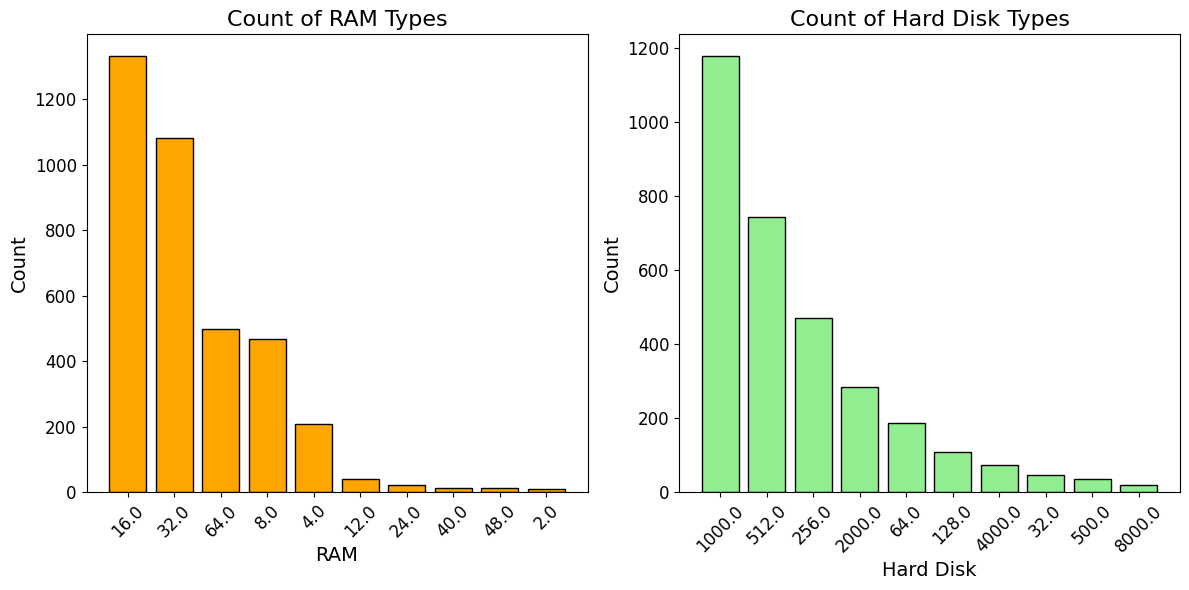

In [315]:
# most famous ram (by capacity) and harddisk (by storage)
ram_group = df.groupby('ram').size().reset_index(name='Count').sort_values(by='Count', ascending=False).nlargest(10, 'Count')
harddisk_group = df.groupby('harddisk').size().reset_index(name='Count').sort_values(by='Count', ascending=False).nlargest(10, 'Count')

fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

# Bar plot for RAM
axs[0].bar(x=ram_group['ram'].astype(str), height=ram_group['Count'], color='orange', edgecolor='black')
axs[0].set_title('Count of RAM Types', fontsize=16)
axs[0].set_xlabel('RAM', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for Hard Disk
axs[1].bar(x=harddisk_group['harddisk'].astype(str), height=harddisk_group['Count'], color='lightgreen', edgecolor='black')
axs[1].set_title('Count of Hard Disk Types', fontsize=16)
axs[1].set_xlabel('Hard Disk', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# most popular choice for hardisk is 1 TB and RAM is 16 GB

# Multivariant Analysis

In [ ]:
# Count the frequency of each RAM and harddisk configuration
top_5_ram = df['ram'].value_counts().nlargest(5).index
top_5_harddisk = df['harddisk'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 configurations for both RAM and harddisk
df_top_5 = df[df['ram'].isin(top_5_ram) & df['harddisk'].isin(top_5_harddisk)]

# Group by 'ram' and 'harddisk' and calculate the mean price for these top 5 configurations
grouped = df_top_5.groupby(['ram', 'harddisk'])['price'].mean().reset_index()

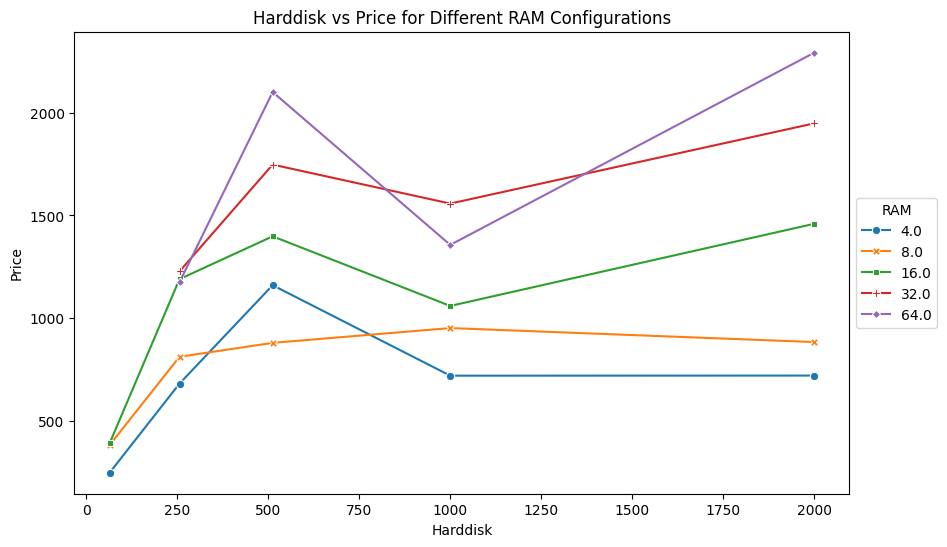

In [ ]:
# Create the plot using seaborn with a different color palette and line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='harddisk', y='price', hue='ram', palette='tab10', style='ram', markers=True, dashes=False)
plt.title('Harddisk vs Price for Different RAM Configurations')
plt.xlabel('Harddisk')
plt.ylabel('Price')
plt.legend(title='RAM', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# here you can see how the price per hard disk varies for each RAM configuration.
# Looking at it from the cost-benefit side it is best to opt for 1 Tera disks with 8 or 16 RAM.

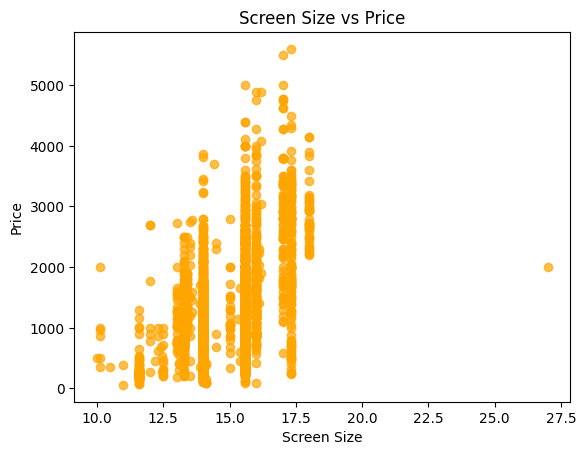

In [320]:
# Screen size vs Price distribution
plt.scatter(df['screen_size'], df['price'], color='orange', alpha=0.7)
plt.title('Screen Size vs Price')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()

In [ ]:
# we cab observe although we can get screen size for low budget also but
# for higher price the screen size increases

# this may be due to the higher pixel and resolution that are required in top end laptops

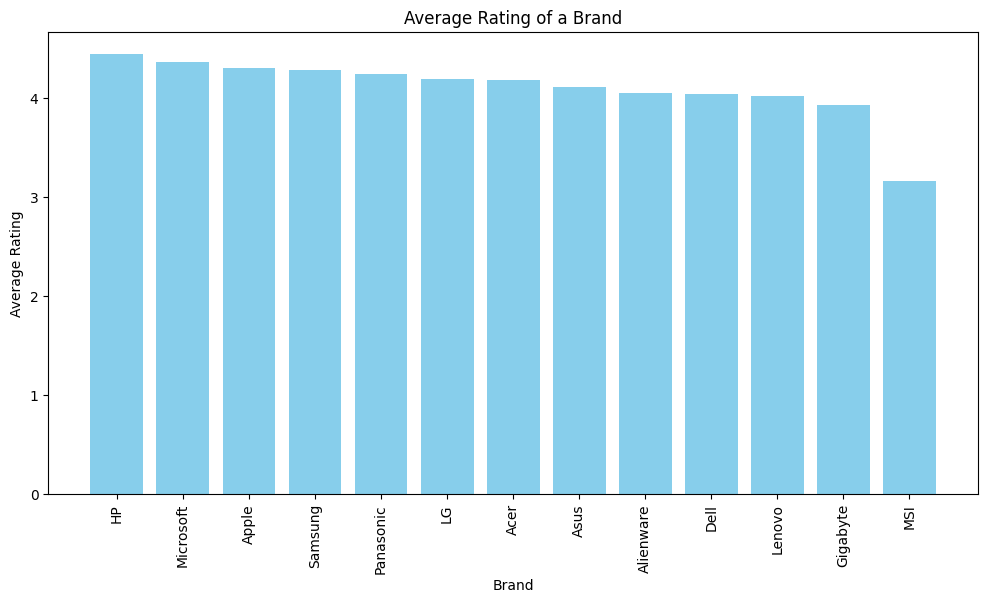

In [318]:
# Calculate the average 'rate' for each brand
brand_avg_rate = df.groupby('brand')['rating'].mean().reset_index()

# Sort the resulting DataFrame by the average 'rate' in descending order
brand_avg_rate = brand_avg_rate.sort_values(by='rating', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(brand_avg_rate['brand'], brand_avg_rate['rating'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating of a Brand')

# Show the chart
plt.show()

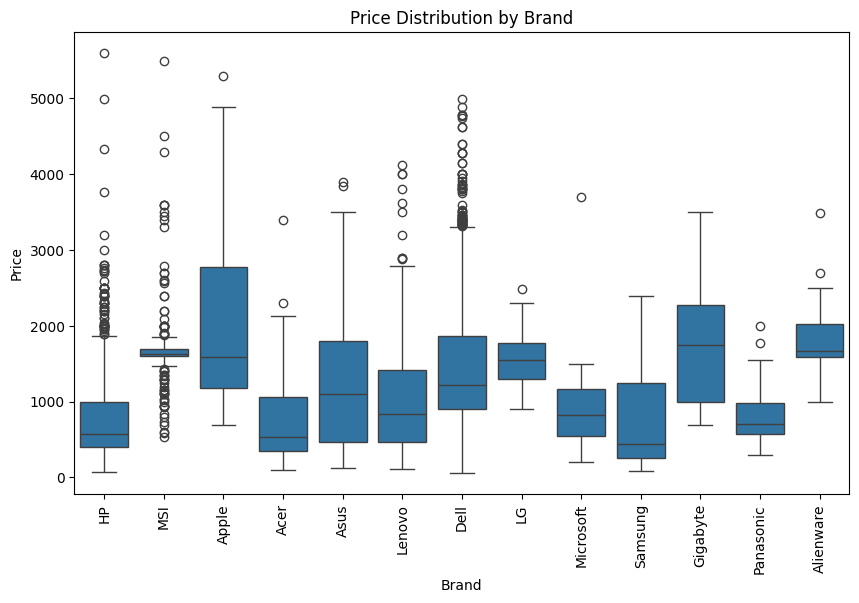

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The majority of brands has a distribution over 4.0. In other hand, the second graphic shows the price distribution of these brands.

#We can observe some insights from this:

# 1. HP brand has the better cost-benefits products because has a low price distribution and a good rating from users.
# 2. Apple has the third place in distribution,but have the highest price distribution. it migh because its exclusive OS and premium computers.
# 3. The most frequency brand "DELL" has the 10th place of rating with 4.04.

# The price distribution of brands is from 600 to 1400 usd, more of less.

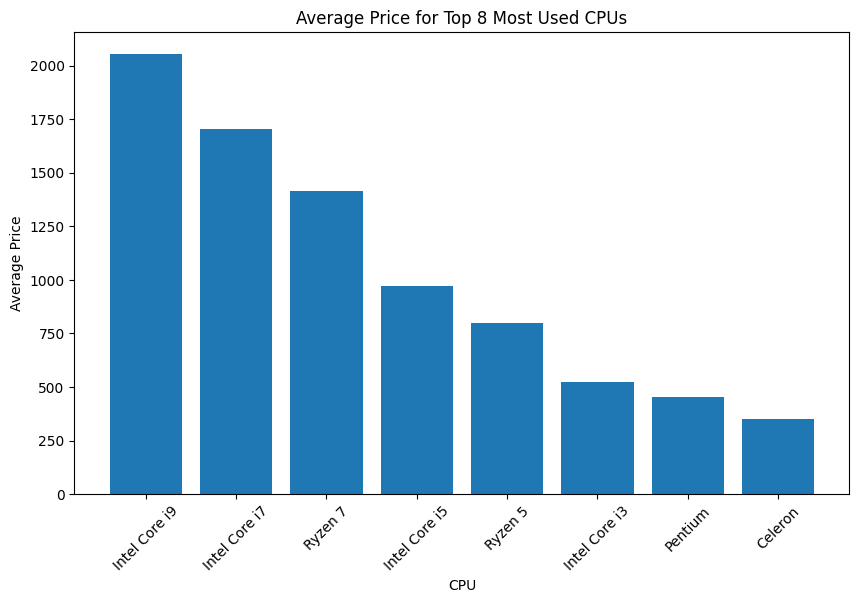

In [148]:
# Count the frequency of each CPU
cpu_counts = df['cpu'].value_counts()

# Sort the CPUs by frequency and take the top 10 most common
top_10_cpus = cpu_counts.nlargest(10).index

# Filter the original DataFrame to include only data for the top 10 most common CPUs
df_top_10 = df[df['cpu'].isin(top_10_cpus)]

# Calculate the mean prices for these top 10 CPUs
grouped = df_top_10.groupby('cpu')['price'].mean().reset_index()

grouped.reset_index()
# Identify rows with specific CPU names to drop
to_drop = ['8032', '']

# Drop rows based on the 'cpu' column values
grouped = grouped[~grouped['cpu'].isin(to_drop)]

# Sort by the average price
grouped = grouped.sort_values('price', ascending=False)

# Plot the average prices per CPU
plt.figure(figsize=(10, 6))
plt.bar(grouped['cpu'], grouped['price'])
plt.xlabel('CPU')
plt.ylabel('Average Price')
plt.title('Average Price for Top 8 Most Used CPUs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# we can observe how the price of a device behaves depending on its processor.

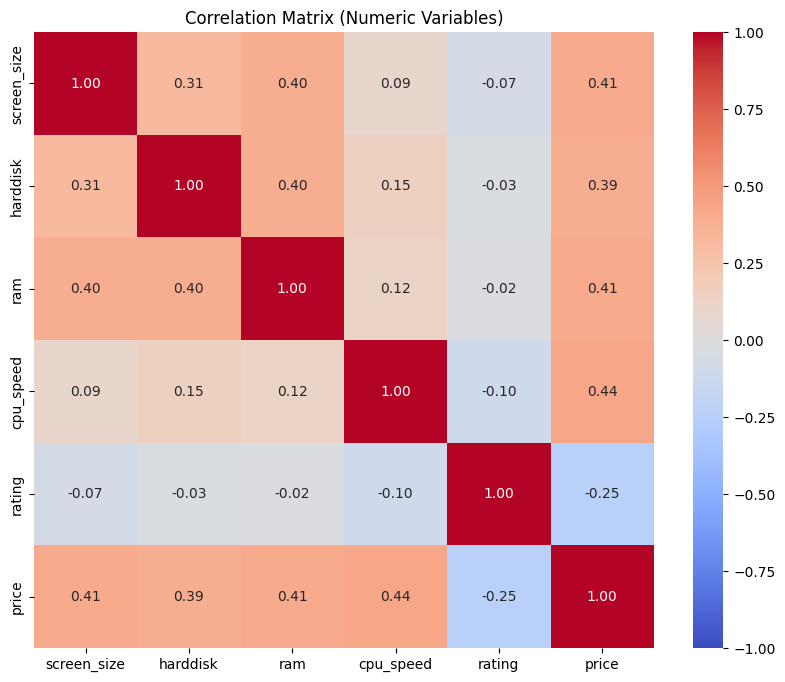

In [146]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a figure and axis for the correlation matrix
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix with limits set to -1 and 1
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Title
plt.title('Correlation Matrix (Numeric Variables)')

# Show the correlation matrix
plt.show()

In [ ]:
# for correlation there is a moderate correlation between
# screen size vs price = 0.41
# cpu_speed vs price = 0.44
# ram vs price = 0.41
# harddisk vs price = 0.39